In [2]:
# ! pip install --user pandas
# ! pip install Jinja2 --user pandas
# ! pip install currencyconverter --user pandas
# ! pip install matplotlib --user pandas

# Hotels in Munnar, Kerala (MakeMyTrip)
fonte: https://www.kaggle.com/datasets/andrewgeorgeissac/hotels-in-munnar-kerala

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from currency_converter import CurrencyConverter
from IPython.display import display

In [19]:
df = pd.read_csv('./data/munnar.csv')
df.head()

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


In [20]:
# tratando dados
df.rename(columns={'Hotel Name\t\t\t\t\t\t\t\t\t': 'Name'}, inplace=True)

df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype(float)

# df['Distance to Landmark'] = df['Distance to Landmark'].str.replace(' km', '')

df.head()

,Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,2728.0,574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,4451.0,969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,2758.0,684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,2675.0,756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,3203.0,654


# dados básicos do arquivo

In [21]:
quantidade_registros = len(df)
nota_minimo = df['Rating'].min()
nota_maximo = df['Rating'].max()
valor_minimo = df['Price'].min()
valor_maximo = df['Price'].max()

df_resumo = pd.DataFrame({'Registros':[quantidade_registros],
                          'Colunas':[df.shape[1]], 
                          'Menor nota': [nota_minimo], 
                          'Maior nota': [nota_maximo], 
                          'menor valor': [valor_minimo], 
                          'Maior valor': [valor_maximo]})
df_resumo

,Registros,Colunas,Menor nota,Maior nota,menor valor,Maior valor
0,74,10,2.8,4.8,930.0,11974.0


# Valores

In [49]:
produtos_abaixo_de_50 = (df['actual_price_BLR'] < 50).sum()
media_abaixo_de_50 = df[df['actual_price_BLR'] < 50]['actual_price_BLR'].mean()

produtos_entre_50_e_500 = ((df['actual_price_BLR'] >= 50) & (df['actual_price_BLR'] <= 500) ).sum()
media_entre_50_e_500 = df[(df['actual_price_BLR'] >= 50) & (df['actual_price_BLR'] <= 500)  ]['actual_price_BLR'].mean()

produtos_acima_de_500 = (df['actual_price_BLR'] > 500).sum()
media_acima_de_500 = df[df['actual_price_BLR'] > 500]['actual_price_BLR'].mean()


estatisticas = pd.DataFrame({
    '': ['Abaixo de R$50', 'entre R$50 e R$500', 'maiores que R$500'],
    'Quantidade': [produtos_abaixo_de_50, produtos_entre_50_e_500, produtos_acima_de_500 ],
    'Média de Preço': [media_abaixo_de_50, media_entre_50_e_500 , media_acima_de_500]
})

estatisticas


,,Quantidade,Média de Preço
0,Abaixo de R$50,755,21.365636
1,entre R$50 e R$500,567,139.827584
2,maiores que R$500,143,1169.728027


In [52]:
# Calcula a média ponderada
soma_rating_multiplicado_por_count = (df['rating'] * df['rating_count']).sum()
soma_rating_count = df['rating_count'].sum()

media_ponderada = soma_rating_multiplicado_por_count / soma_rating_count

# Exibe a média ponderada
print(f"A média ponderada é: {media_ponderada}")


A média ponderada é: 4.464114875073289


# Gráficos

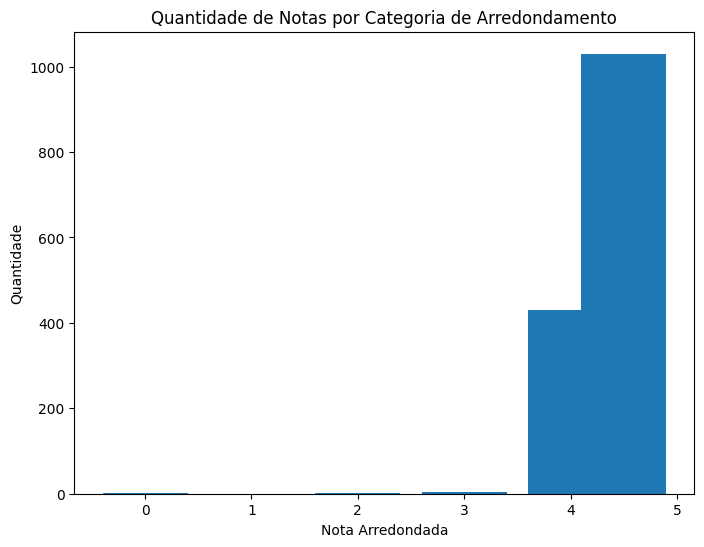

In [63]:
df['nota_arredondada'] = df['rating'].apply(lambda x: 4.5 if x >= 4.5 else int(x))

contagem_notas = df['nota_arredondada'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(contagem_notas.index, contagem_notas.values)

plt.xlabel('Nota Arredondada')
plt.ylabel('Quantidade')
plt.title('Quantidade de Notas por Categoria de Arredondamento')

plt.show()

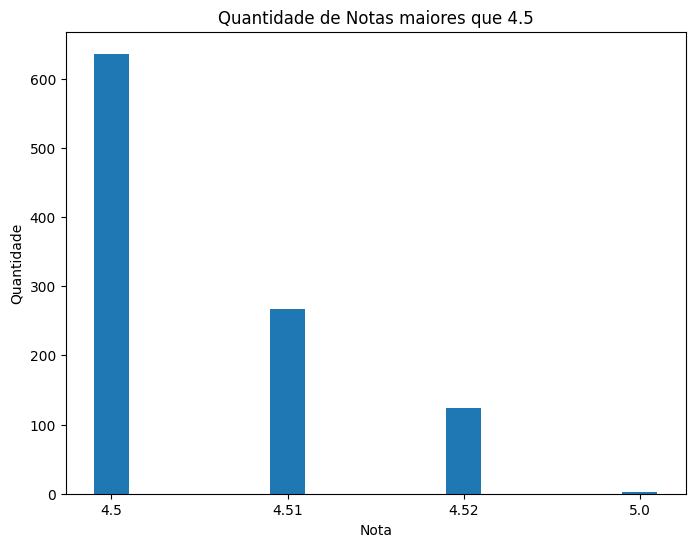

In [95]:
df_filtered = df[df['rating'] >= 4.5]
contagem_notas_maior_que_4 = df_filtered['rating'].value_counts().sort_index()


plt.figure(figsize=(8, 6))

posicoes_x = np.arange(len(contagem_notas_maior_que_4.index))
plt.bar(posicoes_x, contagem_notas_maior_que_4.values, width=0.2, align='center' )

plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.title('Quantidade de Notas maiores que 4.5')


plt.xticks(posicoes_x, contagem_notas_maior_que_4.index)
plt.show()

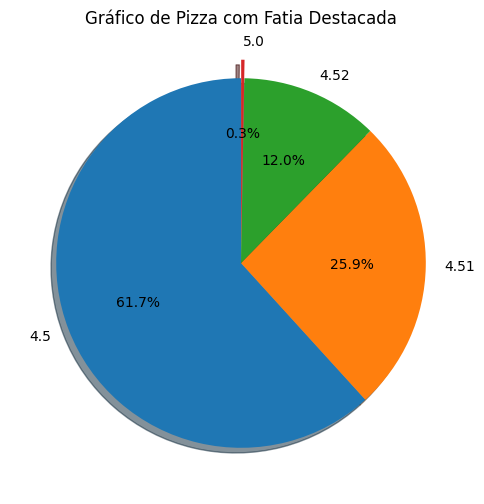

In [94]:
explode = (0, 0, 0, 0.1)  # procurar depois como dinamizar isso

plt.figure(figsize=(6, 6))
plt.pie(contagem_notas_maior_que_4.values, labels=contagem_notas_maior_que_4.index, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)

plt.title('Gráfico de Pizza com Fatia Destacada')

plt.show()

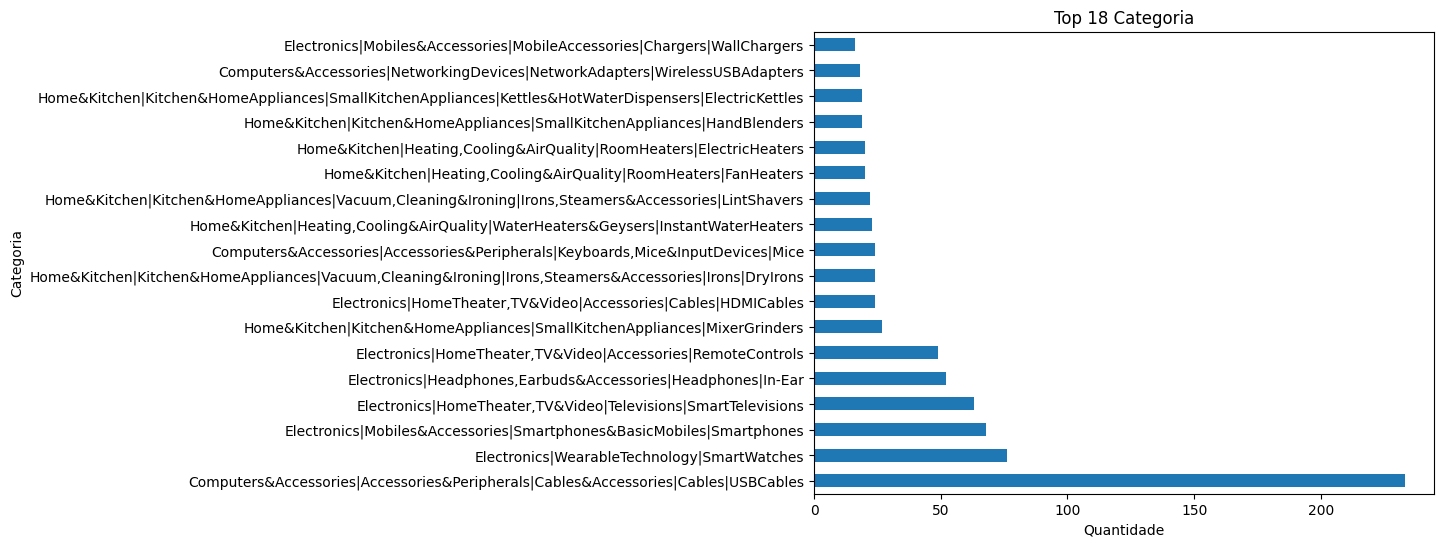

In [99]:
contagem_categorias = df['category'].value_counts().head(18)

plt.figure(figsize=(8, 6))
contagem_categorias.plot(kind='barh')

plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.title('Top 18 Categoria')

plt.show()

# Desafios do dia 1:

 * Adicionar a formatação condicional de cores à coluna de porcentagens.

In [20]:

def highlight_porcent(val):    
    color = ''
    if val >= 75:
        color = 'background-color:yellow'
    elif val > 60:
        color = 'background-color:lightyellow'
    elif val > 50:
        color = 'background-color:limeyellow'
    elif val >= 30:
        color = 'background-color:paleyellow'
    return color
    

df_sorted = df.sort_values(by='porcent', ascending=False)
df_styled = df_sorted.style.applymap(highlight_porcent, subset=['porcent'])

# df_styled